**Junnan Shimizu**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 6A: K-Nearest Neighbor

In this lab we will be using the library scikit-learn to train a K-Nearest Neighbor classifier and graph the results.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

/var/folders/b_/0p9b6l2s6x13bk377kvjypbm0000gn/T/ipykernel_32888/1135383004.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
/var/folders/b_/0p9b6l2s6x13bk377kvjypbm0000gn/T/ipykernel_32888/1135383004.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


## Task 1: Load and visualize dataset

- Below, load in the datasets (`file_train.csv`, `file_test.csv`). the training set has 800 samples and the test set has 200 samples.
- Create a figure with two subplots showing the train and test data side-by-side.
    - Be sure to label your subplots with informative titles (which datset are we looking at?).
    - Color-code the points based on their class.
    - Set the figure size to make everything clearly legible (not microscopic).

#### Format of data
- Column 1: x coordinate of a 2D point.
- Column 2: y coordinate of a 2D point.
- Column 3: class. Which spiral arm does the point belong to? Labels: [0, 1]

Text(0.5, 1.0, 'file_test')

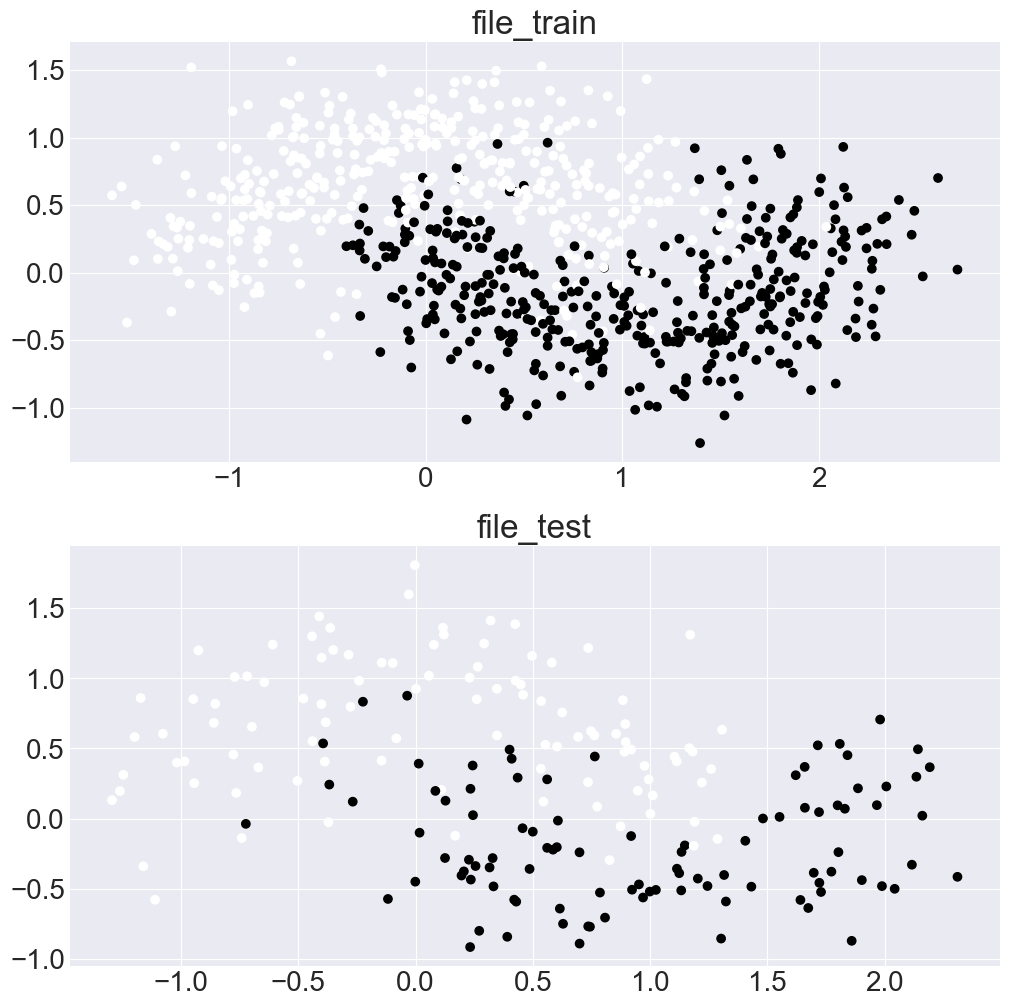

In [3]:
file_train = pd.read_csv('data/file_train.csv', header=None, names=['Column1', 'Column2', 'Column3'])
file_test = pd.read_csv('data/file_test.csv', header=None, names=['Column1', 'Column2', 'Column3'])

fig, axs = plt.subplots(2, 1, figsize=(12, 12))
axs[0].scatter(file_train['Column1'], file_train['Column2'], c=file_train['Column3'])
axs[0].set_title('file_train')
axs[1].scatter(file_test['Column1'], file_test['Column2'], c=file_test['Column3'])
axs[1].set_title('file_test')

## Task 2: Predict dataset and graph results

1. Create a [K-Nearest Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) [(More Info)](https://scikit-learn.org/stable/modules/neighbors.html#classification).  Set `n_neighbors` equal to 10.
2. Use the fit method with the coordinate columns of the training dataset as X and the class column as the target.
3. Calculate the accuracy of the classifier with the test data using the score method.
4. Print the accuracy of the classifier.
    

In [4]:
n = neighbors.KNeighborsClassifier(n_neighbors=10)
n.fit(X=file_train.iloc[:, :2], y=file_train['Column3'])
print(n.score(file_test.iloc[:, :2], y=file_test['Column3']))
print("Your accuracy should be 0.92")

0.92
Your accuracy should be 0.92


## Task 3: Visualize class boundaries

Visualize how different regions of the (2D) dataspace would be classified based on the results of the trained KNN Classifier from Task 2.

1. Create a meshgrid for predicting values
    1. Create a [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) for your x-axis and your y-axis
        2. Set the start argument to the min value of your column -.5
        3. Set the end argument to the max value of your column +.5
        4. Set the number of samples to 300
    2. Assign `x_samples` and `y_samples` to a [meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) with the linspace as the arguments for x1 and x2.
    3. [Flatten](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.flatten.html)`x_samples` and `y_samples` and save into new variables.
    3. Create a list of x and y sample coordinate pairs, by [column stacking](https://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html) the flattened x_samples and y_samples
2. Use your coordinate pairs as predict inputs for the knn classifier you created in Task 2. 
3. Reshape the results to the same shape as `x_samples`.
1. In 1 plot, graph your results
    1. Create two [ListedColormap](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.colors.ListedColormap.html) [(example)](https://matplotlib.org/3.2.1/tutorials/colors/colormap-manipulation.html)
        1. One should have dark values of 2 colors
        1. One should have light values of the same 2 colors
    1. Use [pcolormesh](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html) to plot your predicted values grid.
        1. Plot x_samples, y_samples and your reshaped predicted results and the light value colormap.
    2. Plot the training points with using a scatter plot with the dark value colormap.
    3. Title your plot and label the axis.

/Users/junnanshimizu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(90000,)
(300, 300)


/var/folders/b_/0p9b6l2s6x13bk377kvjypbm0000gn/T/ipykernel_32888/2464901196.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(file_train['Column1'], file_train['Column2'], cmap=cmap_dark)


Text(0, 0.5, 'y')

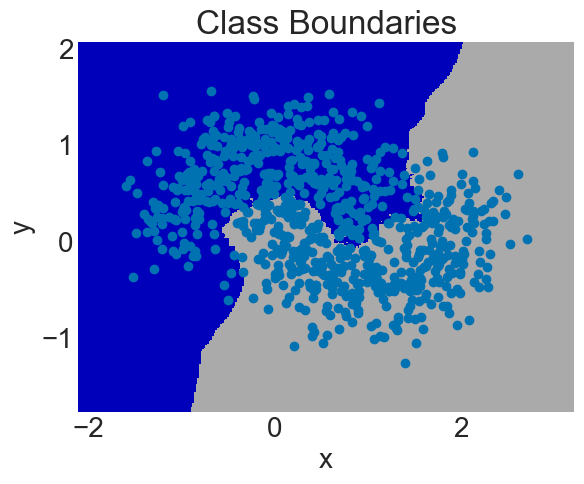

In [48]:
x_start = file_train['Column1'].min() - 0.5
x_end = file_train['Column1'].max() + 0.5
y_start = file_train['Column2'].min() - 0.5
y_end = file_train['Column2'].max() + 0.5

lin_x = np.linspace(x_start, x_end, num=300)
lin_y = np.linspace(y_start, y_end, num=300)

x_samples, y_samples = np.meshgrid(lin_x, lin_y)

x_samples = np.array(x_samples)
y_samples = np.array(y_samples)

flat_x = x_samples.flatten()
flat_y = y_samples.flatten()

coords = np.column_stack((flat_x, flat_y))

result = n.predict(coords)
print(result.shape)
result = np.reshape(result, (np.shape(x_samples)))
print(result.shape)
result = result.reshape((300,300))

cmap_dark = ListedColormap(['#000000', '#111111'])
cmap_light = ListedColormap(['#0000BB', '#AAAAAA'])

plt.pcolormesh(x_samples, y_samples, result, cmap=cmap_light)
plt.scatter(file_train['Column1'], file_train['Column2'], cmap=cmap_dark)
plt.title('Class Boundaries')
plt.xlabel('x')
plt.ylabel('y')